In [4]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")

# Modeling
from gensim.models import KeyedVectors
from spherical_kmeans import SphericalKMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

# Additional
import math
import os
from tqdm import tqdm

from base import Base

DIR = "../../../assets"
SONG2VEC_KV_PATH = f"{DIR}/model/song2vec.kv"
USER_TRACKS_PATH=f'{DIR}/user-data/tracks.txt'

In [5]:
track_df = pd.read_csv(USER_TRACKS_PATH, engine='c', encoding='utf-8')
track_df = track_df.drop_duplicates(subset=['name', 'artists', 'id']).dropna().set_index('id')
word_vectors = KeyedVectors.load(SONG2VEC_KV_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '../../../assets/user-data/tracks_22u5a4if5c3lrsqv5fzjqgelq.csv'

In [13]:
track_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,name,artists,duration,explicit,popularity,date
id,,,,,,,,,,,,,,,,,
0QZ5yyl6B6utIWkxeBDxQN,0.545,0.366,2,-9.510,1,0.0378,0.9690,0.267000,0.6410,0.100,86.997,The Night We Met,['6ltzsmQQbmdoHHbLZ4ZN25'],208211,0,75,1428336000
0CZ8lquoTX2Dkg7Ak2inwA,0.600,0.535,4,-7.043,1,0.1070,0.6480,0.000005,0.1620,0.269,71.912,1950,['6beUvFUlKliUYJdLOXNj9C'],225133,1,78,1519315200
3hARuUtzTdUuWH1KiLJlSf,0.714,0.483,4,-9.378,0,0.1950,0.4360,0.000023,0.2800,0.670,91.025,Window,['4iMO20EPodreIaEl8qW66y'],139293,1,72,1587052800
0oTyoTKEKMdF3rXcOLyEfN,0.708,0.701,0,-5.196,1,0.0328,0.0310,0.000000,0.3920,0.504,120.932,Bloom,['3WGpXCj9YhhfX11TToZcXP'],222096,0,66,1535644800
1q3RiD1tIWUpGsNFADMlvl,0.602,0.609,0,-7.803,1,0.0243,0.0382,0.000200,0.1270,0.337,93.060,All Too Well,['06HL4z0CvFAxyc27GXpf02'],327893,0,60,1350835200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4cluDES4hQEUhmXj6TXkSo,0.726,0.787,4,-2.494,1,0.0737,0.0090,0.000000,0.0596,0.888,124.990,What Makes You Beautiful,['4AK6F7OLvEQ5QYCBNiQWHq'],199986,0,80,1337875200
72C7aUQECOhNtnD0AC36ua,0.512,0.754,0,-6.031,1,0.0549,0.1350,0.000000,0.0881,0.336,147.890,They Don't Know About Us,['4AK6F7OLvEQ5QYCBNiQWHq'],201693,0,78,1352390400
6YUTL4dYpB9xZO5qExPf05,0.596,0.856,4,-3.556,0,0.0346,0.0211,0.017800,0.1410,0.743,127.949,Summer,['7CajNmpbOovFoOoasH2HaY'],222533,0,81,1414684800


In [3]:
# Select heuristic variables where track_id exists in model
filtered_b62_ids = [track_id for track_id in track_df.index.tolist() if (
    str(Base.to10(track_id)) in word_vectors)]
# heuristic_unscaled_df = track_df.loc[filtered_b62_ids, [
#     #'danceability', # Possible colinearity with energy and valance
#     'energy',
#     #'loudness',
#     'acousticness',
#     'instrumentalness',
#     #'liveness',
#     'valence',
#     #'tempo',
#     #'popularity',
#     'date'
# ]]
# # Song2Vec weights from 0 to 1, conform heuristics too
# heuristic_vectors = MinMaxScaler().fit_transform(heuristic_unscaled_df)
# heuristic_vectors.shape


In [4]:
filtered_track_ids = [str(Base.to10(track_id)) for track_id in filtered_b62_ids] # Numeric ids
vectors = word_vectors[filtered_track_ids] # np.concatenate((word_vectors[filtered_track_ids], heuristic_vectors), axis=1) # Model + heuristics per sample
filtered_song_df = song_df.loc[filtered_track_ids].reset_index().drop_duplicates(
    subset='num_track_id', keep='first').set_index('num_track_id')
# TODO: Omission of certain songs is problematic
# 2140 songs in libarary, only 1355 scraped, only 315 in corpus....
print(len(track_df), len(vectors)) 
vectors.shape

1355 1175


(1175, 256)

The song vectors can be visualized using a gradient of colors. The model is trained using 256 dimensions, therefore there will be 256 color bars for each song, representing element values in the vector. The similarity between songs is calculated using **cosine similarity**:

$similarity(A,B) = cos(\theta) = \frac{A.B}{\|A\| \|B\|}$

Mathematically it measures the cosine of the angle between two vectors $A$ and $B$ which projected in a multi-dimensional space. Song vectors with similar context occupy close spatial positions; the cosine between such vectors should be close to 1, i.e. angle is closer to 0. The smaller the angle, the cosine similarity will be higher.

What can we do with the song vectors? One thing is to group them into several clusters using K-Means clustering, but keep in mind that the similarity between vectors is calculated using cosine distance instead of regular (Euclidean) distance. Therefore K-Means with cosine distance should be considered, which often called **Spherical K-Means Clustering**. The idea is to identify the centroid such that it uniforms and minimizes the angle between each vector in a cluster. The intuition is just like looking at a cluster of stars where each point should have consistent spacing between each other. This spacing is referred to as the cosine similarity.

100%|██████████| 30/30 [00:16<00:00,  1.80it/s]


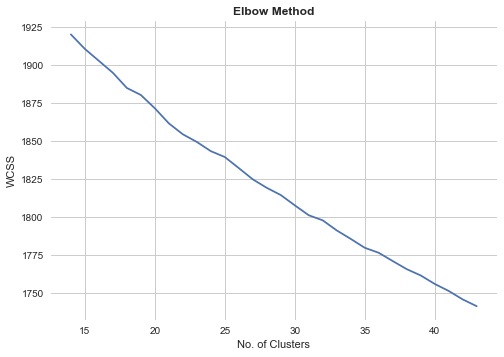

In [5]:
# 25-60 songs per playlist
range_k_clusters = (max(len(vectors)//60-5, 3),min(len(vectors)//30+5,50))
skm_list = []
for k in tqdm(range(*range_k_clusters, 1)):
    skm = SphericalKMeans(n_clusters = k,
                          n_init = 5, n_jobs = -1,
                          random_state = 123).fit(vectors)
    skm_list.append({
        "k": k,
        "WCSS": skm.inertia_,
        "skm_object": skm
    })
skm_df = pd.DataFrame(skm_list).set_index('k')
skm_df.WCSS.plot()
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method", fontweight = "bold")
plt.show()

In [6]:
def locateOptimalElbow(x, y):
    # START AND FINAL POINTS
    p1 = (x[0], y[0])
    p2 = (x[-1], y[-1])
    
    # EQUATION OF LINE: y = mx + c
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = (p2[1] - (m * p2[0]))
    
    # DISTANCE FROM EACH POINTS TO LINE mx - y + c = 0
    a, b = m, -1
    dist = np.array([abs(a*x0+b*y0+c)/math.sqrt(a**2+b**2) for x0, y0 in zip(x,y)])
    return x[np.argmax(dist)]

In [7]:
k_opt = locateOptimalElbow(skm_df.index, skm_df['WCSS'].values)
skm_opt = skm_df.loc[k_opt, "skm_object"]
k_opt

22

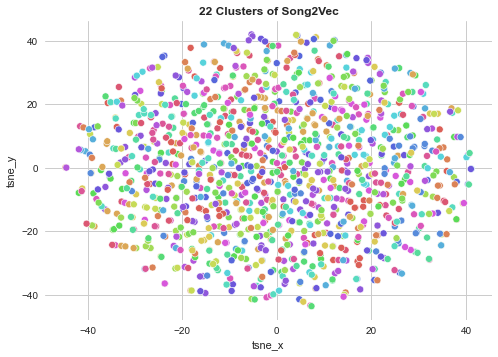

In [8]:
embedding_tsne = TSNE(n_components = 2, metric = 'cosine',
                      random_state = 123).fit_transform(vectors)
filtered_song_df.loc[:,'tsne_x'] = embedding_tsne[:,0]
filtered_song_df.loc[:,'tsne_y'] = embedding_tsne[:,1]
filtered_song_df.loc[:, 'cluster'] =skm_opt.labels_
sns.scatterplot(data = filtered_song_df,
                x = 'tsne_x', y = 'tsne_y', palette = sns.color_palette("hls", k_opt),
                hue = 'cluster', legend = False).set_title(f"{k_opt} Clusters of Song2Vec",
                                                           fontweight = "bold")
plt.show()

In [9]:
import os, asyncio, json
from random import shuffle
from tqdm import trange, tqdm
from requests.exceptions import ReadTimeout

version = '0.7'

async def post(track_ids, clusters, num_clusters, username, user_sp, oldplaylistspath='db/playlist_ids.json'):
	playlists=[]
	playlists = [[] for _ in range(num_clusters)]
	for track_id, cluster in zip(track_ids, clusters):
		playlists[cluster].append(track_id)

	if os.path.isfile(f'./{oldplaylistspath}'):
		with open(f'./{oldplaylistspath}', 'r') as f:
			old_ids = json.load(f)
			for old_id in tqdm(old_ids, desc='Delete Old', leave=False):
					await user_sp.user_playlist_unfollow(username, old_id)

	playlist_ids = []
	print([len(el) for el in playlists])
	for i in trange(len(playlists), desc="Make Playlists", leave=False):
		shuffle(playlists[i])
		playlist_id = (await user_sp.user_playlist_create(
			username, 
			f"#{i+1} songworm",
			#"{}".format(medoids[i], version), 
			public=True, 
			description="An organised playlist, made for you by SongWorm-v{}".format( version)
		))['id']
		playlist_ids.append(playlist_id)
		for offset in trange(0, len(playlists[i])+101, 100, desc="Add Tracks", leave=False):
				track_ids = playlists[i][offset: min(offset+100,len(playlists[i]))]
				# track_ids = ['spotify:track:'+id for id in track_ids]
				if not len(track_ids): break
				res = await user_sp.user_playlist_add_tracks(username, playlist_id, track_ids)

	with open(f'./{oldplaylistspath}', 'w') as f:
		json.dump(playlist_ids, f, ensure_ascii=False, indent=2)

In [10]:
import os, sys
from spotipy.util import prompt_for_user_token
from spotipy.oauth2 import SpotifyClientCredentials
from util.base_async_spotify import BaseAsyncSpotify

def get_auth(username):
	def get_env(var): return os.environ.get(var)
	SCOPE = "ugc-image-upload user-follow-read user-read-recently-played user-top-read user-read-playback-position user-library-read user-library-modify user-read-playback-state user-read-currently-playing user-modify-playback-state playlist-read-collaborative playlist-modify-private playlist-modify-public streaming app-remote-control user-read-email user-read-private"
	# TODO: Remove hardcoded tokens in prod
	CLIENT_ID = get_env("SPOTIPY_CLIENT_ID") or "2c7634d7d9f74568a9b7bcf43840d731"
	CLIENT_SECRET = get_env("SPOTIPY_CLIENT_SECRET") or "597db2608ae848f485d3483036844812"
	REDIRECT_URI = get_env("SPOTIPY_REDIRECT_URI") or "http://127.0.0.1:8081"
	token = prompt_for_user_token(username, SCOPE, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI)
	client = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
	assert token, "Token must not be None. Do not decline Spotify authorization request."
	assert client, "Client must not be None. Do you have valid client ID and secret in .env?"

	user_sp = BaseAsyncSpotify(auth=token)
	sp = BaseAsyncSpotify(client_credentials_manager=client)
	return (sp, user_sp)


In [16]:
[Base.to62(int(track_id)).rjust(22, '0') for track_id in track_df.index.tolist()]

ValueError: invalid literal for int() with base 10: '0QZ5yyl6B6utIWkxeBDxQN'

In [11]:
processed_ids= [Base.to62(int(track_id)).rjust(22, '0') for track_id in filtered_song_df.index.tolist()][:20]
original_ids = filtered_song_df.loc[:, 'track_id'][:20].tolist()
set(processed_ids).symmetric_difference(set(original_ids))
# Each track id is exactly 22 chars
# Base conversion loses leading zeros - becomes invalid id
# Make valid again by padding zeros: https://stackoverflow.com/questions/339007/how-to-pad-zeroes-to-a-string


{'0CZ8lquoTX2Dkg7Ak2inwA',
 '0QZ5yyl6B6utIWkxeBDxQN',
 '0oTyoTKEKMdF3rXcOLyEfN',
 'CZ8lquoTX2Dkg7Ak2inwA',
 'QZ5yyl6B6utIWkxeBDxQN',
 'oTyoTKEKMdF3rXcOLyEfN'}

In [12]:
username = '22u5a4if5c3lrsqv5fzjqgelq'
sp, user_sp = get_auth(username)
await post(filtered_song_df.loc[:, 'track_id'].tolist(), filtered_song_df.loc[:, 'cluster'].tolist(), k_opt, username, user_sp, '../assets/user-data/playlist_ids.json')

CancelledError: 